In [8]:
import osmnx as ox
import networkx as nx
import geopandas as gp
import matplotlib.pyplot as plt

In [9]:
portland = (45.523064,-122.676483)

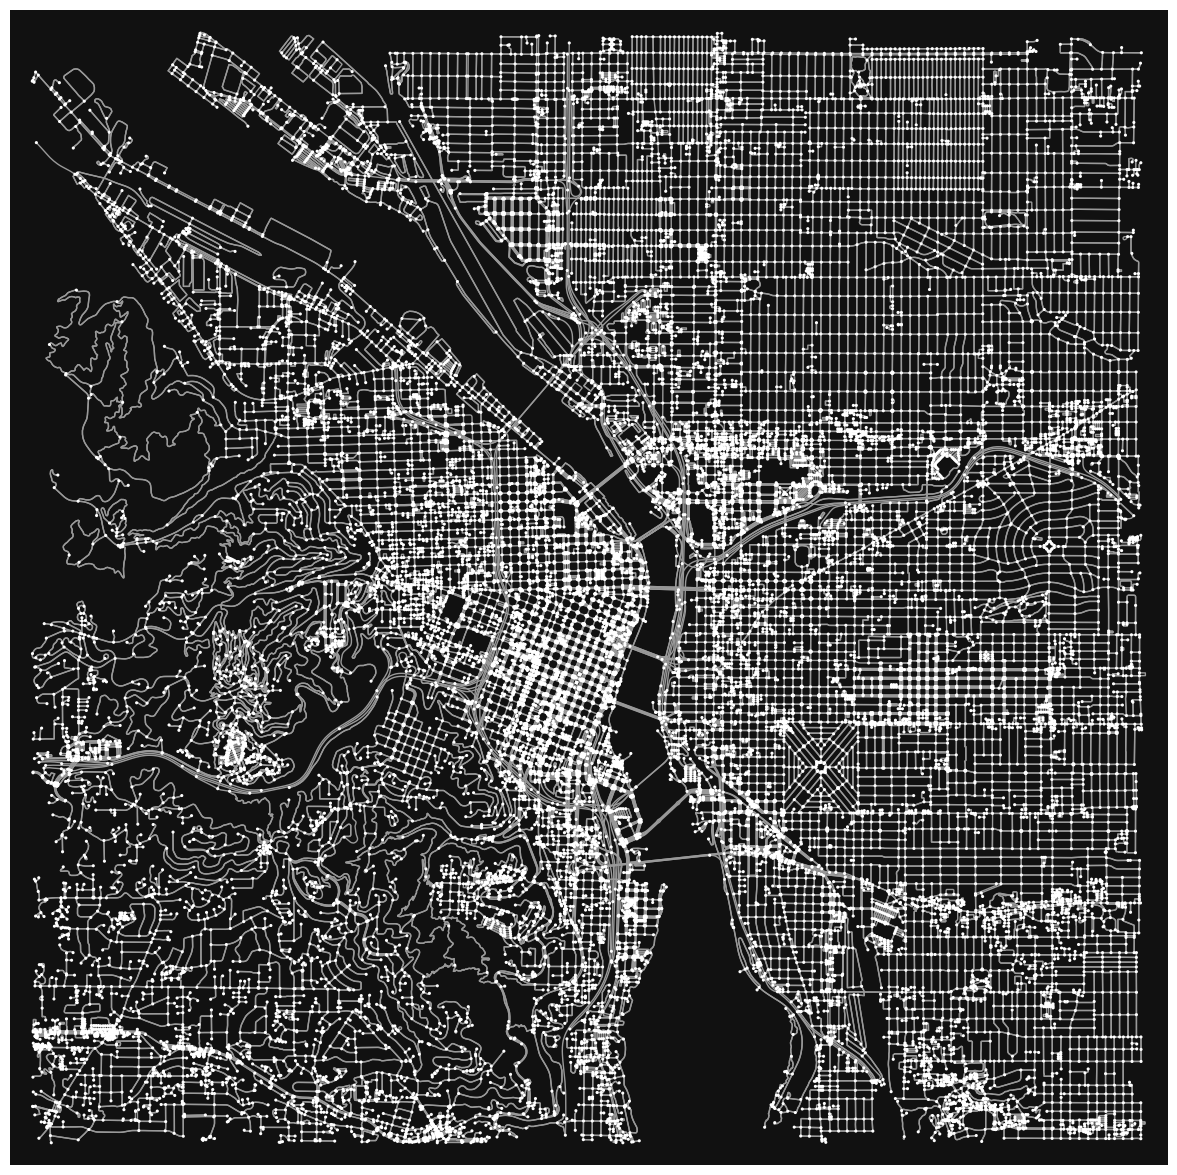

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [24]:
base_map = ox.graph_from_point(portland, dist = 5000, simplify=True)
ox.plot_graph(base_map, figsize= (15,15), node_size=5)

In [25]:
base_map_proj = ox.project_graph(base_map)
nodes_proj = ox.graph_to_gdfs(base_map_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

99595890.23920104

In [31]:
ox.basic_stats(base_map_proj, area=graph_area_m, clean_int_tol=15)

{'n': 29395,
 'm': 81607,
 'k_avg': 5.552440891308046,
 'edge_length_total': 4286357.27399995,
 'edge_length_avg': 52.5243823936666,
 'streets_per_node_avg': 3.038543970062936,
 'streets_per_node_counts': {0: 0,
  1: 3941,
  2: 224,
  3: 16198,
  4: 8838,
  5: 182,
  6: 11,
  7: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1340704201394795,
  2: 0.007620343595849634,
  3: 0.5510460962748767,
  4: 0.30066337812553157,
  5: 0.006191529171627828,
  6: 0.0003742133015819017,
  7: 3.401939105290015e-05},
 'intersection_count': 25454,
 'street_length_total': 2337721.224000002,
 'street_segment_count': 44544,
 'street_length_avg': 52.481169719827626,
 'circuity_avg': 1.0736563934331393,
 'self_loop_proportion': 0.002963362068965517,
 'clean_intersection_count': 9404,
 'node_density_km': 295.14270046084795,
 'intersection_density_km': 255.5727946089615,
 'edge_density_km': 43037.49144372661,
 'street_density_km': 23472.065146317378,
 'clean_intersection_density_km': 94.4215667676072}

Closeness centrality measures how central or well-connected a node is within a network. It is calculated by looking at the average distance from a node to all other nodes in the network.

In [27]:
edge_centrality = nx.closeness_centrality(nx.line_graph(base_map))
nx.set_edge_attributes(base_map, edge_centrality, "edge_centrality")

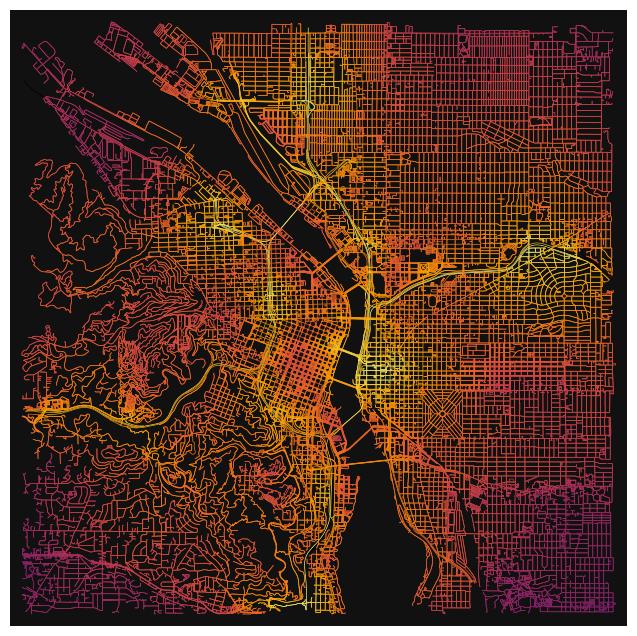

In [30]:
ec = ox.plot.get_edge_colors_by_attr(base_map, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(base_map, edge_color=ec, edge_linewidth=0.5, node_size=0)